In [41]:
import shades
from typing import Tuple
import random
import numpy as np

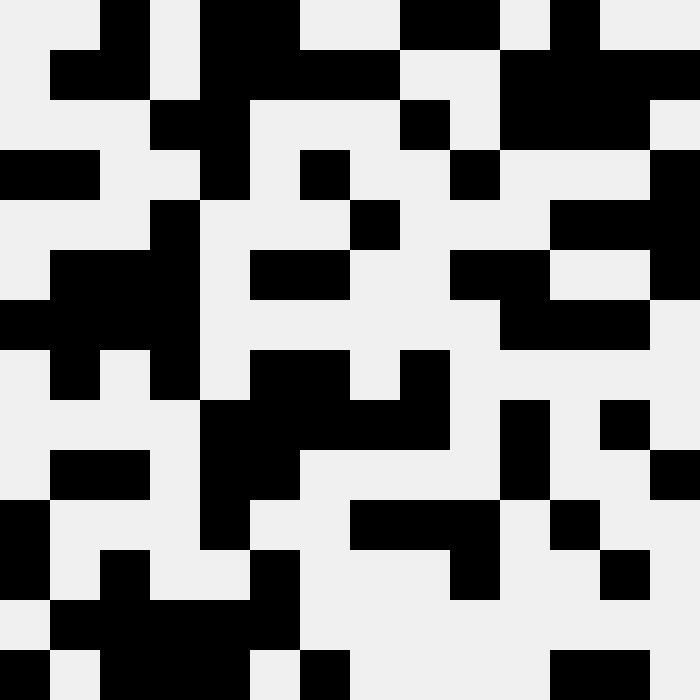

In [4]:
# let's just start with a grid

canvas = shades.Canvas()
toner = shades.BlockColor()
grid_size = 50

for x in range(0, canvas.width, grid_size):
    for y in range(0, canvas.height, grid_size):
        if random.random() < 0.5:
            toner.square(canvas, (x,y ), grid_size)

canvas

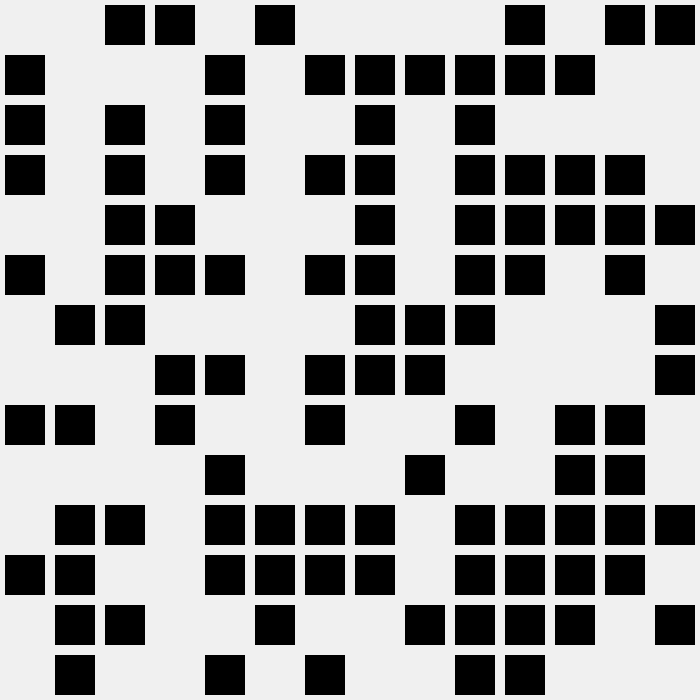

In [7]:
# actually, I'm surprised by how nice that simple pattern actually is
# what if we add a little padding in?

canvas = shades.Canvas()
toner = shades.BlockColor()
grid_size = 50
padding = 10

for x in range(0, canvas.width, grid_size):
    for y in range(0, canvas.height, grid_size):
        if random.random() < 0.5:
            toner.square(canvas, (int(x + padding/2), int(y + padding/2)), grid_size - padding)

canvas

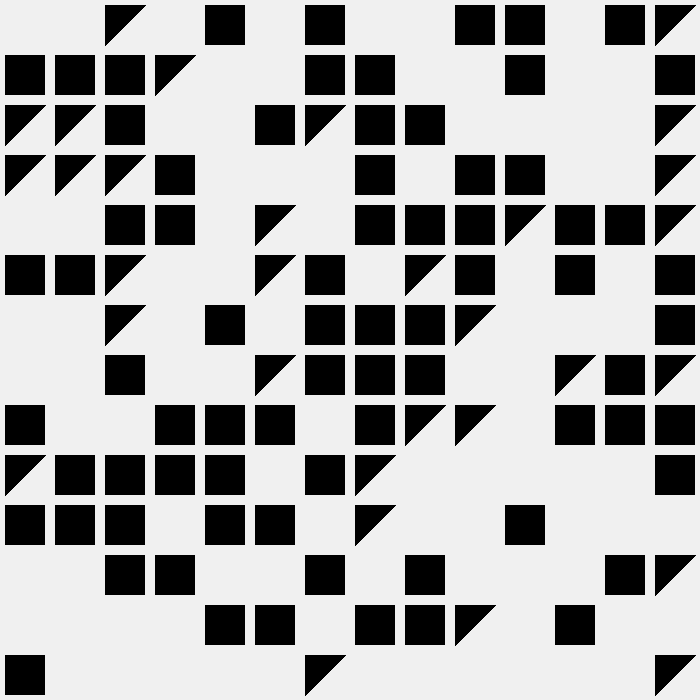

In [8]:
# yippee, now let's sometimes do a triangle?

canvas = shades.Canvas()
toner = shades.BlockColor()
grid_size = 50
padding = 10

for x in range(0, canvas.width, grid_size):
    for y in range(0, canvas.height, grid_size):
        if random.random() < 0.5:
            if random.random() < 0.7:
                toner.square(canvas, (int(x + padding/2), int(y + padding/2)), grid_size - padding)
            else:
                toner.triangle(
                    canvas,
                    (int(x + padding/2), int(y + padding/2)),
                    (int(x + grid_size - padding/2), int(y + padding/2)),
                    (int(x + padding/2), int(y + grid_size - padding/2)),
                )

canvas

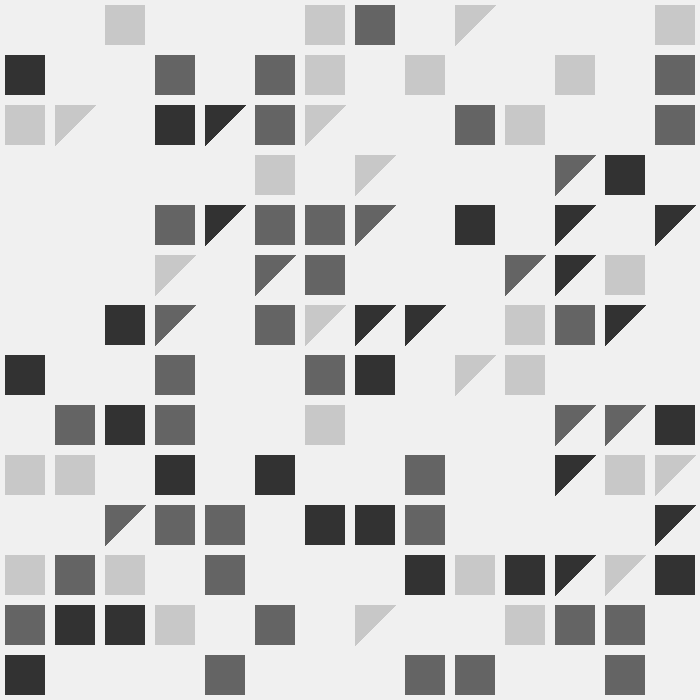

In [12]:
# ok, now what if we vary the tone a bit?

canvas = shades.Canvas()
toners = [
    shades.BlockColor((100, 100, 100)),
    shades.BlockColor((200, 200, 200)),
    shades.BlockColor((50, 50, 50)),
]
grid_size = 50
padding = 10

for x in range(0, canvas.width, grid_size):
    for y in range(0, canvas.height, grid_size):
        if random.random() < 0.5:
            toner = random.choice(toners)
            if random.random() < 0.7:
                toner.square(canvas, (int(x + padding/2), int(y + padding/2)), grid_size - padding)
            else:
                toner.triangle(
                    canvas,
                    (int(x + padding/2), int(y + padding/2)),
                    (int(x + grid_size - padding/2), int(y + padding/2)),
                    (int(x + padding/2), int(y + grid_size - padding/2)),
                )

canvas

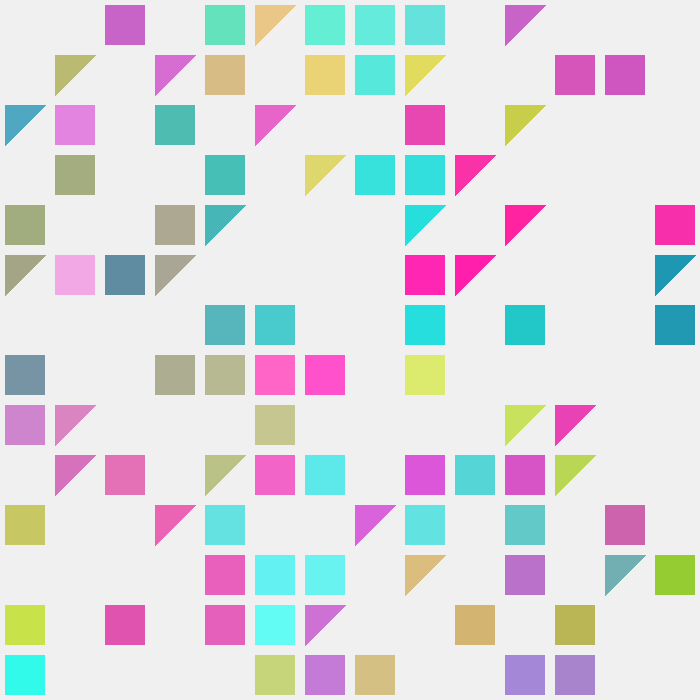

In [26]:
# some more interesting colors?

canvas = shades.Canvas()
toners = [
    shades.NoiseGradient((100, 200, 200), color_fields=shades.noise_fields(channels=3)),
    shades.NoiseGradient((200, 100, 200), color_fields=shades.noise_fields(channels=3)),
    shades.NoiseGradient((200, 200, 100), color_fields=shades.noise_fields(channels=3)),
]
block = shades.BlockColor()
grid_size = 50
padding = 10

for x in range(0, canvas.width, grid_size):
    for y in range(0, canvas.height, grid_size):
        if random.random() < 0.5:
            toner = random.choice(toners)
            block.color = toner.determine_shade((x, y))
            if random.random() < 0.7:
                block.square(canvas, (int(x + padding/2), int(y + padding/2)), grid_size - padding)
            else:
                block.triangle(
                    canvas,
                    (int(x + padding/2), int(y + padding/2)),
                    (int(x + grid_size - padding/2), int(y + padding/2)),
                    (int(x + padding/2), int(y + grid_size - padding/2)),
                )

canvas

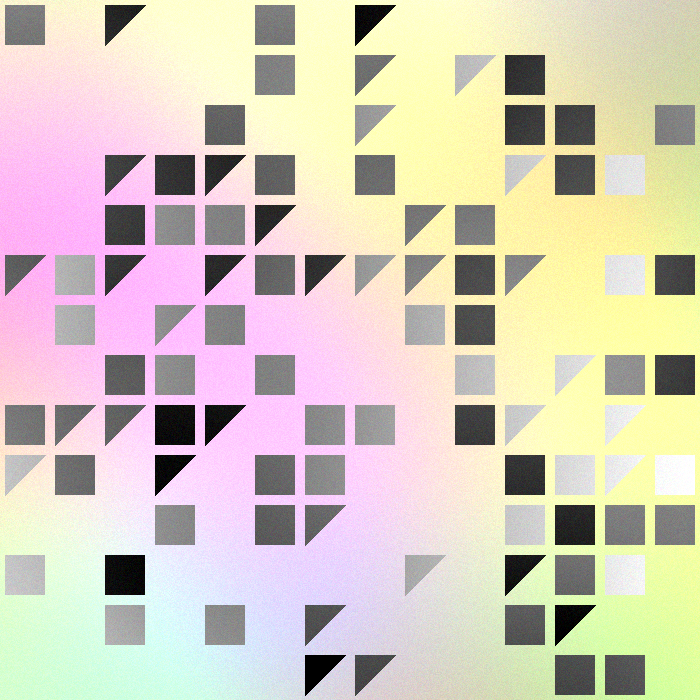

In [74]:
# I'd like to see the same effect but with NoiseyGradient used
class NoiseyGradient(shades.Shade):
    def __init__(
        self,
        color: Tuple[int, int, int] = (0, 0, 0),
        warp_noise: Tuple[shades.NoiseField, shades.NoiseField, shades.NoiseField] = shades.noise_fields(channels=3),
        warp_size: int = 0,
        color_variance: int = 70,
        color_fields: Tuple[shades.NoiseField, shades.NoiseField] = shades.noise_fields(channels=3),
        fuzz: int = 90,
    ):
        super().__init__(color, warp_noise, warp_size)
        self.color_variance = color_variance
        self.color_fields = tuple(color_fields)
        self.fuzz = fuzz

    def determine_shade(self, xy_coords: Tuple[int, int]) -> Tuple[int, int, int]:
        def apply_noise(i):
            noise = self.color_fields[i].noise(xy_coords) - 0.5
            color_affect = noise * (2*self.color_variance)
            return self.color[i] + color_affect + random.randint(-self.fuzz, self.fuzz)
        return shades.color_clamp([apply_noise(i) for i in range(len(self.color))])


canvas = shades.Canvas()
toners = [
    NoiseyGradient(
        np.repeat(random.randint(0, 255), 3),
        color_fields=shades.noise_fields(seed=random.randint(0, 999), channels=3),
        fuzz=10,

    ) for i in range(3)
]
grid_size = 50
padding = 10

# also fill the canvas
NoiseyGradient(
    [random.randint(200, 255) for i in range(3)],
    color_fields=shades.noise_fields(channels=3),
    fuzz=10,
).fill(canvas)

for x in range(0, canvas.width, grid_size):
    for y in range(0, canvas.height, grid_size):
        if random.random() < 0.5:
            toner = random.choice(toners)
            if random.random() < 0.7:
                toner.square(canvas, (int(x + padding/2), int(y + padding/2)), grid_size - padding)
            else:
                toner.triangle(
                    canvas,
                    (int(x + padding/2), int(y + padding/2)),
                    (int(x + grid_size - padding/2), int(y + padding/2)),
                    (int(x + padding/2), int(y + grid_size - padding/2)),
                )

canvas